In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Считаем данные

In [2]:
X_train = pd.read_csv("./Data/x_train.csv", delimiter=';', header=None)
y_train = pd.read_csv("./Data/y_train.csv", delimiter=';', header=None)
X_test = pd.read_csv("./Data/x_test.csv", delimiter=';', header=None) 
y_test = pd.read_csv("./Data/y_test.csv", delimiter=';', header=None)

In [3]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,0.320294,0.789564,0.305234,0.569579,0.916917,0.710729,0.502887,0.123825,1.549114,1.012985,...,3.905776,0.050249,1.652129,0.348495,1.268308,1.692855,10.972974,-34.651392,5.635283,-0.965972
1,-1.047974,0.098152,4.709796,0.063126,0.432243,0.638654,0.694468,0.791365,2.992625,-1.166921,...,4.822711,0.355136,3.810700,3.247255,-1.554161,2.506891,17.714096,12.537078,0.709831,0.337938
2,-0.488228,0.209715,1.328547,0.577500,0.454313,0.932798,0.470434,0.579927,4.157941,-0.076968,...,4.699418,0.136547,2.722004,0.794660,0.529090,5.016028,23.457600,39.258455,5.358375,1.034913
3,1.191010,1.005726,0.644007,0.021036,0.737313,0.225796,0.648582,0.334123,2.632267,-0.160811,...,4.860352,0.262532,1.703520,0.671193,-0.411733,2.358890,2.645531,16.002217,2.486295,0.434648
4,2.186114,1.327732,9.758608,-0.188493,0.036524,0.431486,0.494194,0.501352,3.486749,-0.580023,...,2.856243,0.701544,5.154188,19.887777,0.596292,10.548786,-2.565012,33.901742,4.573770,0.901521


In [4]:
# Сбалансированы ли данные?
np.unique(y_train, return_counts=True)[1] / np.unique(y_train, return_counts=True)[1].sum()

array([0.03181427, 0.33562625, 0.43049584, 0.17024936, 0.03181427])

In [5]:
y_train = np.array(y_train)

### 2. Визуализация

In [6]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [7]:
%%time
tsne = TSNE(verbose=1)
manifold = tsne.fit_transform(X_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3489 samples in 0.013s...
[t-SNE] Computed neighbors for 3489 samples in 1.324s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3489
[t-SNE] Computed conditional probabilities for sample 2000 / 3489
[t-SNE] Computed conditional probabilities for sample 3000 / 3489
[t-SNE] Computed conditional probabilities for sample 3489 / 3489
[t-SNE] Mean sigma: 21.952802
[t-SNE] KL divergence after 250 iterations with early exaggeration: 82.367020
[t-SNE] KL divergence after 1000 iterations: 1.636631
CPU times: user 23.8 s, sys: 15.1 ms, total: 23.8 s
Wall time: 23.8 s


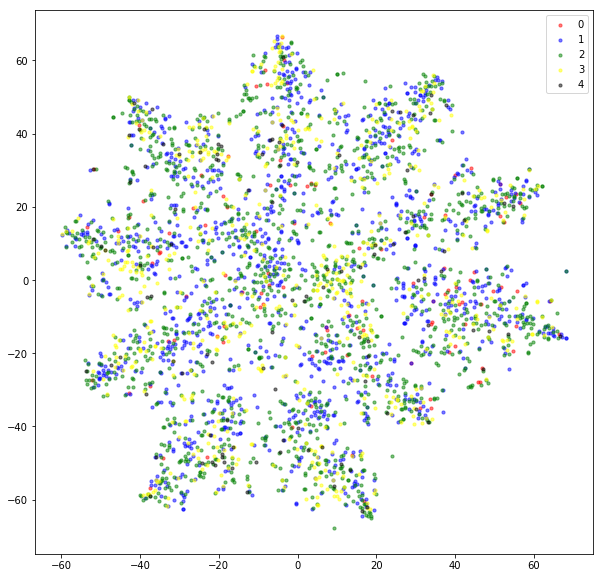

In [8]:
targets = np.unique(y_train)
cdict = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'black'}
plt.figure(figsize=(10, 10))
for t in targets:
    idx = np.where(y_train==t)[0]
    plt.scatter(manifold[idx, 0], manifold[idx, 1], c=cdict[t], s=10, alpha=0.5, label=t)
plt.legend()
plt.show()

In [9]:
pca = PCA(n_components=2)
manifold = pca.fit_transform(X_train)

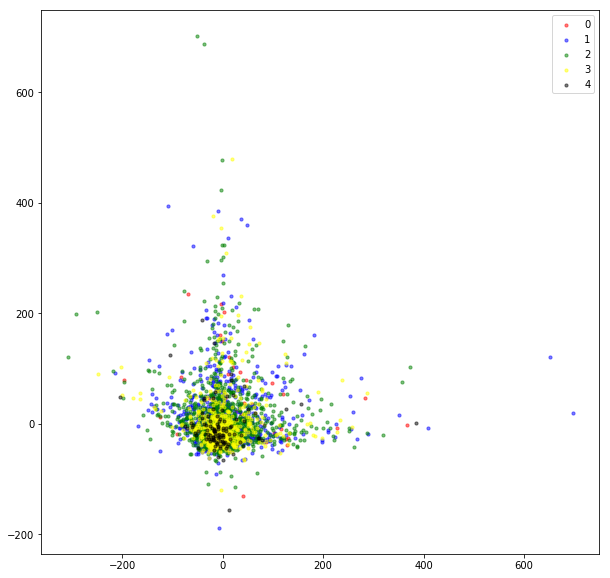

In [10]:
targets = np.unique(y_train)
cdict = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'black'}
plt.figure(figsize=(10, 10))
for t in targets:
    idx = np.where(y_train==t)[0]
    plt.scatter(manifold[idx, 0], manifold[idx, 1], c=cdict[t], s=10, alpha=0.5, label=t)
plt.legend()
plt.show()

Забыл сказать... Оба метода работают на данных, которые центрированы и шкалированы

In [11]:
#scaling here
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train.update(scaler.fit_transform(X_train))
X_test.update(scaler.transform(X_test))

In [12]:
import time

start = time.time()
for i in range(1000000):
    pass
end = time.time()

print(end - start)

0.03523516654968262


In [13]:
%%time
tsne = TSNE(verbose=1)
manifold = tsne.fit_transform(X_train)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3489 samples in 0.016s...
[t-SNE] Computed neighbors for 3489 samples in 1.491s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3489
[t-SNE] Computed conditional probabilities for sample 2000 / 3489
[t-SNE] Computed conditional probabilities for sample 3000 / 3489
[t-SNE] Computed conditional probabilities for sample 3489 / 3489
[t-SNE] Mean sigma: 2.274213
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.974800
[t-SNE] KL divergence after 1000 iterations: 2.560390
CPU times: user 27.7 s, sys: 3.67 ms, total: 27.7 s
Wall time: 27.7 s


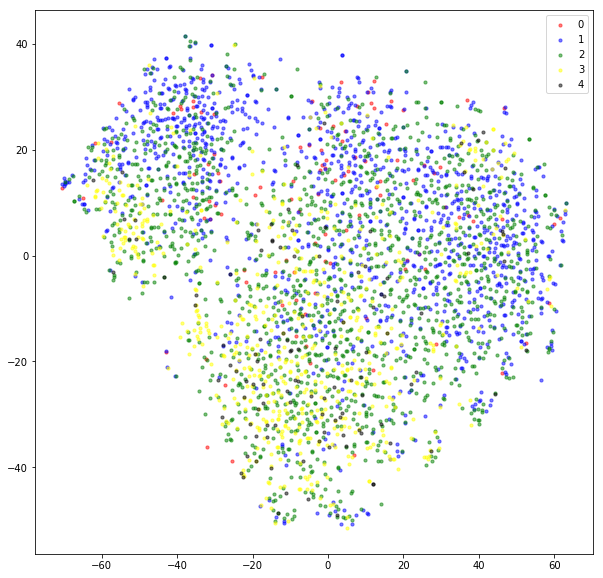

In [14]:
targets = np.unique(y_train)
cdict = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'black'}
plt.figure(figsize=(10, 10))
for t in targets:
    idx = np.where(y_train==t)[0]
    plt.scatter(manifold[idx, 0], manifold[idx, 1], c=cdict[t], s=10, alpha=0.5, label=t)
plt.legend()
plt.show()

In [15]:
%%time
pca = PCA(n_components=2)
manifold = pca.fit_transform(X_train)

CPU times: user 53.2 ms, sys: 44.6 ms, total: 97.8 ms
Wall time: 16 ms


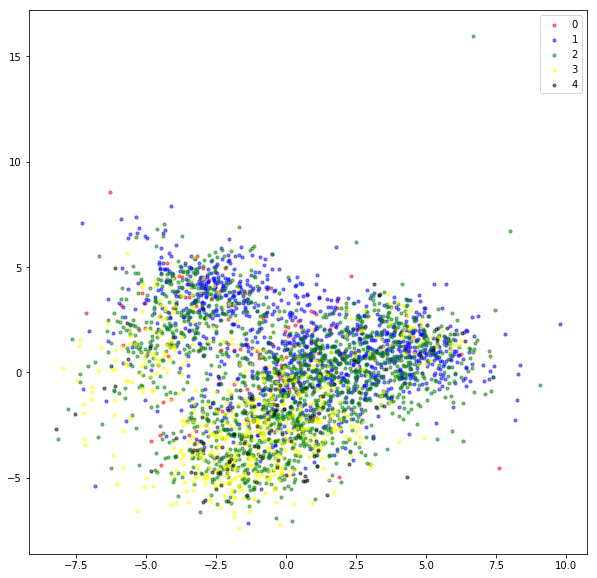

In [16]:
targets = np.unique(y_train)
cdict = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'black'}
plt.figure(figsize=(10, 10))
for t in targets:
    idx = np.where(y_train==t)[0]
    plt.scatter(manifold[idx, 0], manifold[idx, 1], c=cdict[t], s=10, alpha=0.5, label=t)
plt.legend()
plt.show()

### 3. Посмотрим на RF на сырых данных

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [18]:
def get_cv_score(X, Y, cv=5):
    rf_clf = RandomForestClassifier(n_estimators=100)
    scores = cross_val_score(rf_clf, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    print("Accuracy: {0}".format(np.mean(scores)))

In [19]:
get_cv_score(X_train, y_train)

Accuracy: 0.5600575086044346


### 3. Feature processing

In [20]:
X = X_train.copy()
y = y_train.copy()

In [21]:
def plot_importance(clf, X):
    importances = clf.feature_importances_
    std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(20, 8))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices])
    plt.xlim([-1, X.shape[1]])
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


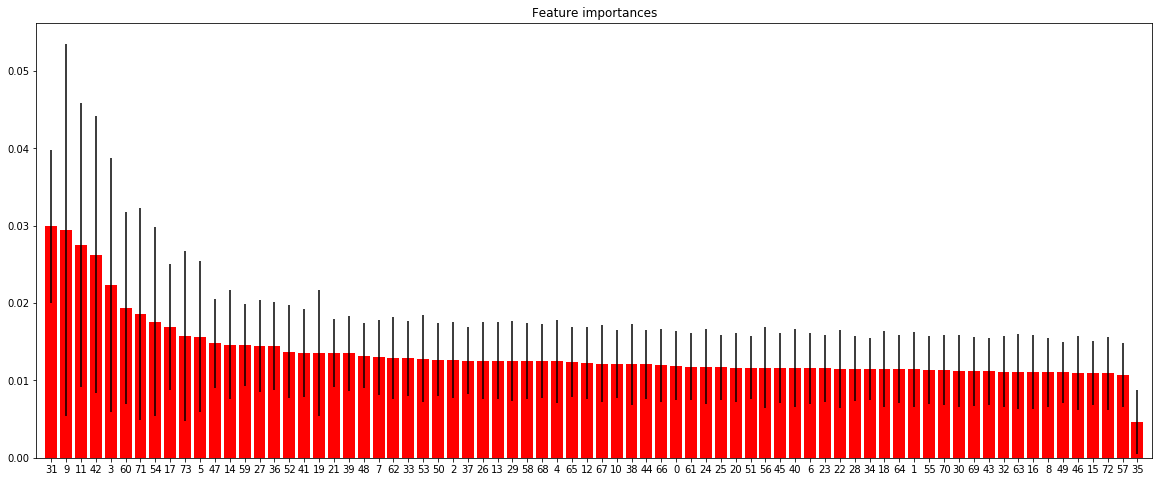

In [22]:
rf_clf = RandomForestClassifier(n_estimators=100).fit(X, y)
plot_importance(rf_clf, X)

In [23]:
rf_clf.feature_importances_

array([0.01189996, 0.0114321 , 0.01267088, 0.0223645 , 0.01246715,
       0.01566281, 0.01159905, 0.01297975, 0.0110546 , 0.02944556,
       0.0121275 , 0.02749968, 0.01221251, 0.01254924, 0.01459937,
       0.0109459 , 0.01110643, 0.01688651, 0.01145455, 0.01356422,
       0.01166542, 0.01356205, 0.01151456, 0.01157134, 0.01176695,
       0.01168205, 0.01255065, 0.01446101, 0.01150155, 0.01252829,
       0.01120635, 0.02992886, 0.01111905, 0.01285378, 0.0114826 ,
       0.00465232, 0.01444115, 0.01255092, 0.01209984, 0.01349678,
       0.0116116 , 0.01359308, 0.02625322, 0.01116103, 0.01207527,
       0.01161963, 0.01096355, 0.01477943, 0.01319582, 0.01103111,
       0.01270114, 0.01164874, 0.01372975, 0.01281996, 0.01756787,
       0.01132632, 0.01163972, 0.0107437 , 0.01250831, 0.01458293,
       0.01937249, 0.01179467, 0.01288943, 0.01111303, 0.01143466,
       0.01236978, 0.01193692, 0.01214259, 0.01248341, 0.01116816,
       0.01130934, 0.01858343, 0.01094329, 0.01574885])

In [24]:
from sklearn.feature_selection import SelectFromModel

In [40]:
#отберем признаки на основе важностей для random forest
model = SelectFromModel(rf_clf, prefit=True)
X_sfm = model.transform(X_train)

In [41]:
get_cv_score(X_sfm, y)

Accuracy: 0.5778148357646103


In [53]:
X_train.columns[model.get_support()]

Int64Index([3, 5, 9, 11, 14, 17, 19, 21, 27, 31, 36, 41, 42, 47, 52, 54, 59,
            60, 71, 73],
           dtype='int64')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Optimal number of features : 52


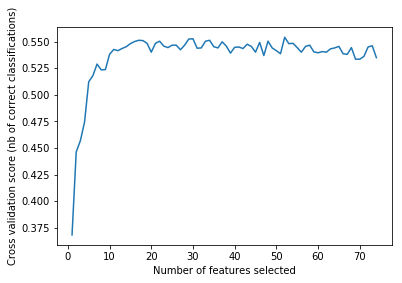

In [60]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV, RFE
from sklearn.metrics import roc_auc_score, make_scorer

# Create the RFE object and compute a cross-validated score.
rf_clf = RandomForestClassifier(n_estimators=100)
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=rf_clf, step=1, cv=StratifiedKFold(2),
              scoring='accuracy', n_jobs=8, verbose=1)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [61]:
X_rfecv = rfecv.transform(X)

In [62]:
get_cv_score(X_rfecv, y)

Accuracy: 0.5548887794576086


In [63]:
pca = PCA()
X_pca = pca.fit_transform(X)

array([1.30660316e-01, 1.03571348e-01, 6.78666511e-02, 4.71609469e-02,
       2.49308709e-02, 2.33563630e-02, 2.30795073e-02, 2.19753236e-02,
       2.17048539e-02, 2.15602841e-02, 2.10801915e-02, 2.08167917e-02,
       2.06477839e-02, 2.04490704e-02, 2.01264372e-02, 1.89845515e-02,
       1.57659119e-02, 1.48607748e-02, 1.44724117e-02, 1.44548743e-02,
       1.39261538e-02, 1.38204160e-02, 1.37986245e-02, 1.35147572e-02,
       1.34294287e-02, 1.32963982e-02, 1.30412118e-02, 1.29693448e-02,
       1.28642142e-02, 1.25842988e-02, 1.22797263e-02, 1.17151048e-02,
       1.08602749e-02, 1.05155456e-02, 9.83575279e-03, 8.89245056e-03,
       8.63831652e-03, 7.95211141e-03, 7.39673988e-03, 6.65747471e-03,
       6.46493243e-03, 6.22288376e-03, 6.10191885e-03, 6.01845381e-03,
       5.81426412e-03, 5.79547827e-03, 5.70298270e-03, 5.63509103e-03,
       5.56993019e-03, 5.48354281e-03, 5.21951775e-03, 5.03487142e-03,
       4.52498853e-03, 4.42754337e-03, 3.56266565e-03, 2.68852537e-03,
      

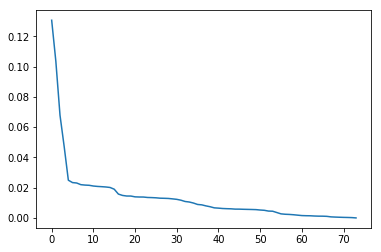

In [64]:
plt.plot(pca.explained_variance_ratio_)
pca.explained_variance_ratio_

In [65]:
get_cv_score(X_pca, y)

Accuracy: 0.4975818288136528


In [68]:
get_cv_score(X_pca[:, :2], y)

Accuracy: 0.4353472651335698


<BarContainer object of 74 artists>

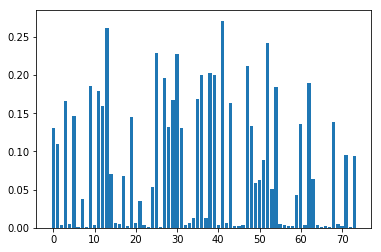

In [66]:
plt.bar(range(X.shape[1]), abs(pca.components_[0]))

In [80]:
mask = abs(pca.components_[0]) > 0.025

In [76]:
X_pca = X_train.values[:, mask]
rf_clf.fit(X_pca, y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [81]:
get_cv_score(X_pca, y)

Accuracy: 0.5738046453805625


In [82]:
from sklearn.model_selection import train_test_split

train_test_split()

In [83]:
from sklearn.neural_network import MLPClassifier, MLPRegressor

In [ ]:
mlp_regressor = MLPRegressor()

### Описание

бла-бла